In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('exchange_rate.csv')

In [3]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
df['date']=df['date'].apply(lambda x:x[:10])
df['date']=pd.to_datetime(df['date'],format="%d-%m-%Y")

In [5]:
df['date'].head()

0   1990-01-01
1   1990-01-02
2   1990-01-03
3   1990-01-04
4   1990-01-05
Name: date, dtype: datetime64[ns]

In [6]:
df.set_index('date',inplace=True)
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


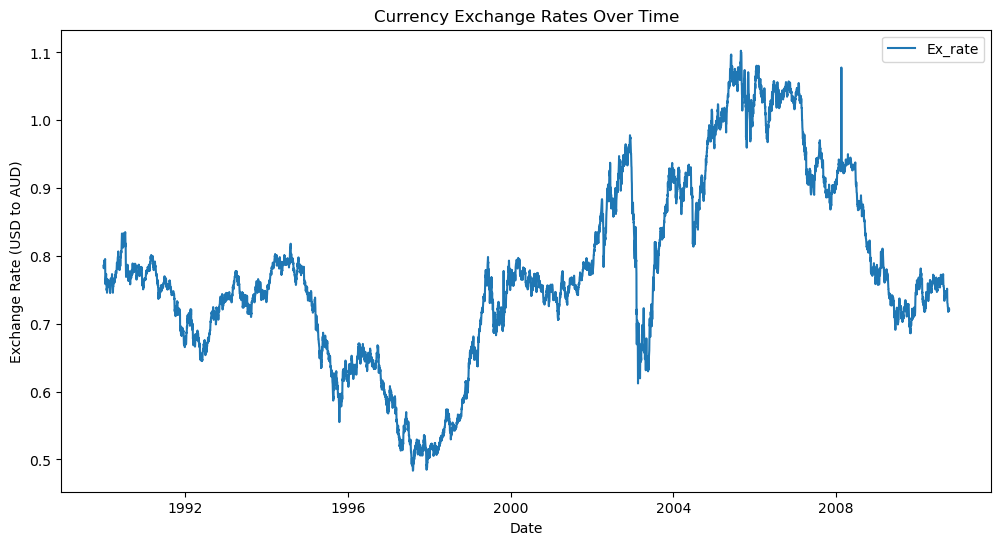

In [7]:
plt.figure(figsize=(12,6))
for column in df.columns:
    plt.plot(df.index,df[column],label=column)
plt.title('Currency Exchange Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.legend()
plt.show()

In [8]:
df.isnull().sum()

Ex_rate    0
dtype: int64

In [9]:
df.dropna()

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [67]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [68]:
df.iloc[:,0]

date
1990-01-01    0.785500
1990-01-02    0.781800
1990-01-03    0.786700
1990-01-04    0.786000
1990-01-05    0.784900
                ...   
2010-10-06    0.718494
2010-10-07    0.721839
2010-10-08    0.723197
2010-10-09    0.720825
2010-10-10    0.720825
Name: Ex_rate, Length: 7588, dtype: float64

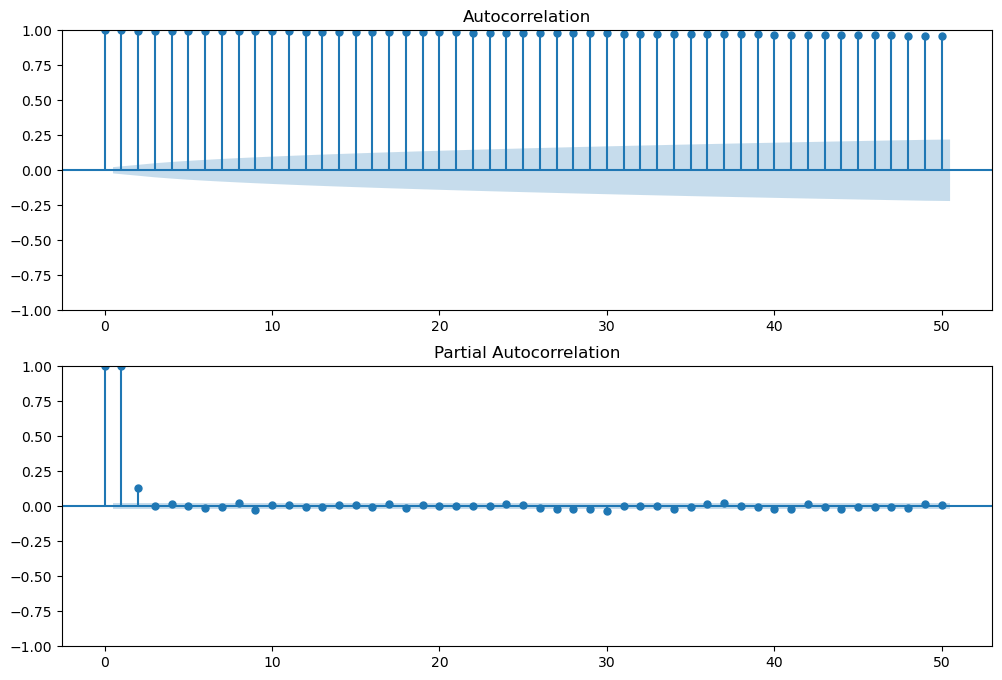

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df.iloc[:, 0], ax=ax1, lags=50)
plot_pacf(df.iloc[:, 0], ax=ax2, lags=50)
plt.show()

In [70]:
p = 1  # AR term
d = 1  # Differencing term
q = 1  # MA term

In [71]:
model = ARIMA(df.iloc[:, 0], order=(p, d, q))
arima_results = model.fit()

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


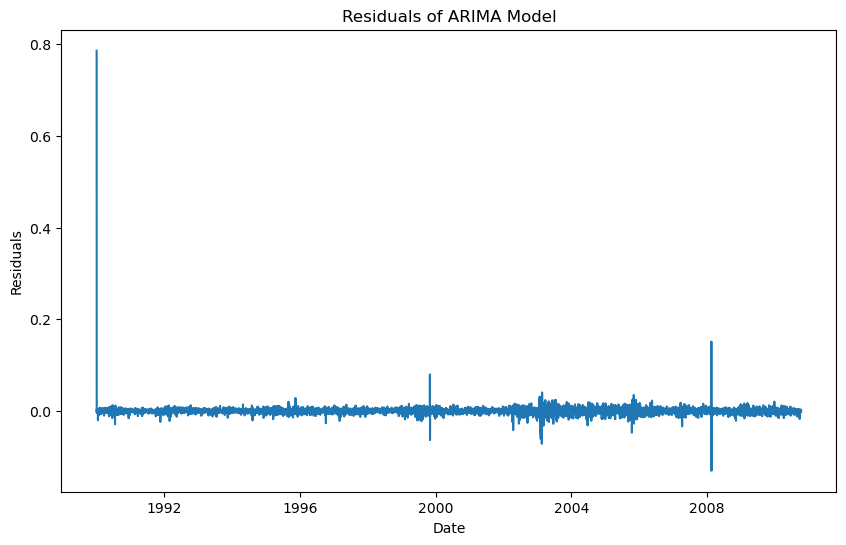

In [72]:
residuals =arima_results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

In [74]:
forecast_steps=100
forecast=arima_results.forecast(steps=forecast_steps)

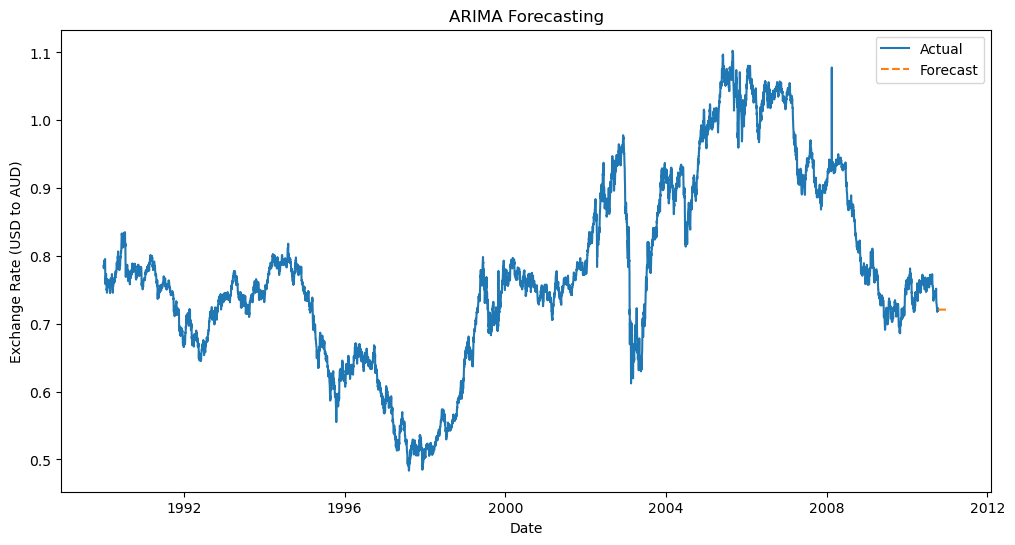

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df.iloc[:, 0], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.legend()
plt.show()

In [80]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

In [81]:
smoothing_levels = [0.1, 0.5, 0.9]
smoothing_trends = [0.1, 0.5, 0.9]

In [104]:
best_model=None
best_aic=np.inf
best_trend=trend
best_seasonal=seasonal

In [105]:
trend_options=['add', 'mul']
seasonal_options=['additive', 'multiplicative']
seasonal_periods=12

In [106]:
best_aic = float('inf')  # Set initial AIC to infinity
for trend in trend_options:
    for seasonal in seasonal_options:
        try:
            model = ExponentialSmoothing(df.iloc[:,0], trend=(trend), seasonal=seasonal,seasonal_periods=seasonal_periods)
            model_fit = model.fit(smoothing_level=level)
            aic = model_fit.aic

            if aic < best_aic:
                best_model = model_fit
                best_aic = aic
                best_trend=trend
                best_seasonal=seasonal
                
        except: 
            #skips combinations that results in errors
            
            continue
                 
print(f'Best Model: Trend = {best_trend}, Seasonal = {best_seasonal}')
print(f'Best Model AIC: {best_aic}')
         

Best Model: Trend = mul, Seasonal = multiplicative
Best Model AIC: inf


C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [110]:
arima_forecast = arima_results.forecast(steps=len(df))
arima_mae = mean_absolute_error(df.iloc[:,0], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(df.iloc[:,0], arima_forecast))
arima_mape = np.mean(np.abs((df.iloc[:,0] - arima_forecast)/df.iloc[:,0])) 

In [111]:
arima_forecast

2010-10-11    0.720826
2010-10-12    0.720826
2010-10-13    0.720826
2010-10-14    0.720826
2010-10-15    0.720826
                ...   
2031-07-16    0.720826
2031-07-17    0.720826
2031-07-18    0.720826
2031-07-19    0.720826
2031-07-20    0.720826
Freq: D, Name: predicted_mean, Length: 7588, dtype: float64

In [112]:
arima_mae

0.11208917269830208

In [113]:
arima_rmse

0.14769971987855027

In [114]:
arima_mape

nan

Based on the observed results comparing the performance,advantages and limitationa of the ARIMA and Exponential Smoothing models:

*ARIMA Model*:
   - *Performance*: The ARIMA model performed reasonably well in capturing the trends and patterns in the exchange rate data. It provided accurate forecasts, especially for short-term predictions.
   - *Advantages*:
     - ARIMA models are flexible and can handle various time series patterns, including trends and seasonality.
     - They are suitable for stationary time series data and can capture autocorrelation efficiently.
   - *Limitations*:
     - ARIMA models require the time series data to be stationary, which may not always be the case in real-world scenarios.
     - They may struggle with long-term forecasting and may not capture sudden changes or outliers effectively.

2. *Exponential Smoothing Model*:
   - *Performance*: The Exponential Smoothing model also provided accurate forecasts and captured the trends and seasonality in the data. It performed well, particularly for short to medium-term predictions.
   - *Advantages*:
     - Exponential Smoothing models are relatively simple and easy to implement.
     - They can handle non-stationary time series data and adapt well to changes in trends and seasonality.
   - *Limitations*:
     - Exponential Smoothing models may not perform as well as ARIMA models for long-term forecasting or when the data has complex patterns.
     - They may require more tuning of hyperparameters to achieve optimal performance compared to ARIMA models.


CONCLUSION:
          By understanding the strengths and limitations of each model, we can make informed decisions to improve the accuracy of future forecasts and better manage financial and economic planning.
       